In [357]:
import pandas as pd
import numpy as np
import os
from pathlib import PureWindowsPath, PurePosixPath
from IPython.display import clear_output

import matplotlib.pyplot as plt
from PIL import Image

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

from PIL import Image
from sklearn.model_selection import train_test_split
#import lightgbm as lgb
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [293]:
base_path = "C:/fiw/root/fiftyone/fiw/"

In [294]:
splits = pd.read_csv(base_path + "splits.csv", header=0)

In [295]:
labels = pd.read_csv(base_path + r"train\labels.csv", header=0)

In [296]:
labels

,p1,p2,ptype,fid1,fid2,tags,set,nsamples,pp,new_type,old_tags
0,F0001/MID1,F0001/MID3,fs,F0001,F0001,0,0,6,F0001.MID1.MID3,NaN,fs
1,F0001/MID1,F0001/MID4,fs,F0001,F0001,0,0,18,F0001.MID1.MID4,NaN,fs
2,F0001/MID2,F0001/MID4,ms,F0001,F0001,0,0,15,F0001.MID2.MID4,NaN,ms
3,F0001/MID2,F0001/MID3,ms,F0001,F0001,0,0,5,F0001.MID2.MID3,NaN,ms
4,F0001/MID3,F0001/MID4,bb,F0001,F0001,0,0,3,F0001.MID3.MID4,bb,ss
...,...,...,...,...,...,...,...,...,...,...,...
6978,F1018/MID4,F1018/MID8,bb,F1018,F1018,962,0,100,F1018.MID4.MID8,bb,bb
6979,F1018/MID4,F1018/MID7,bb,F1018,F1018,962,0,100,F1018.MID4.MID7,bb,bb
6980,F1018/MID6,F1018/MID1,md,F1018,F1018,962,0,55,F1018.MID6.MID1,NaN,md
6981,F1018/MID7,F1018/MID8,bb,F1018,F1018,962,0,100,F1018.MID7.MID8,bb,bb


In [297]:
files = [os.path.join(dp, f) for dp, dn, fn in os.walk(os.path.expanduser(base_path + "/train")) for f in fn]
pfiles = []
for wfile in files:
    path = PureWindowsPath(wfile)
    pfile = str(PurePosixPath('c:/', *path.parts[1:]))
    pfiles.append(pfile)
    
train_images_df = pd.DataFrame({
    'files': pfiles,
    'familyId': [file.split('/')[-3] for file in pfiles],
    'kinId': [file.split('/')[-2] for file in pfiles],
    'uniqueId': [file.split('/')[-2] + '/' + file.split('/')[-3] for file in pfiles]
})

train_images_df = train_images_df[train_images_df['files'].str.endswith('jpg')]
train_images_df.head()

,files,familyId,kinId,uniqueId
2,c:/fiw/root/fiftyone/fiw/train/data/F0001/MID1...,F0001,MID1,MID1/F0001
3,c:/fiw/root/fiftyone/fiw/train/data/F0001/MID1...,F0001,MID1,MID1/F0001
4,c:/fiw/root/fiftyone/fiw/train/data/F0001/MID1...,F0001,MID1,MID1/F0001
5,c:/fiw/root/fiftyone/fiw/train/data/F0001/MID1...,F0001,MID1,MID1/F0001
6,c:/fiw/root/fiftyone/fiw/train/data/F0001/MID1...,F0001,MID1,MID1/F0001


In [298]:
print("Total number of members in the dataset: {0}".format(train_images_df["uniqueId"].nunique()))
print("Total number of families in the dataset: {0}".format(train_images_df["familyId"].nunique()))

Total number of members in the dataset: 3020
Total number of families in the dataset: 571


In [299]:
family_with_most_pic = train_images_df["familyId"].value_counts()
kin_with_most_pic = train_images_df["uniqueId"].value_counts()
print("Family with maximum number of images: {0}, Image Count: {1}".format(family_with_most_pic.index[0], family_with_most_pic[0]))
print("Member with maximum number of images: {0}, Image Count: {1}".format(kin_with_most_pic.index[0], kin_with_most_pic[0]))

Family with maximum number of images: F0601, Image Count: 883
Member with maximum number of images: MID6/F0601, Image Count: 109


In [300]:
family_series = family_with_most_pic[:25]
labels = (np.array(family_series.index))
sizes = (np.array((family_series / family_with_most_pic.sum()) * 100))

trace = go.Pie(labels=labels, values=sizes)
layout = go.Layout(title='Pic Count by Families')
data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='Families')

C:\Users\אליאב\AppData\Local\Temp\ipykernel_25424\2438165332.py:15: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



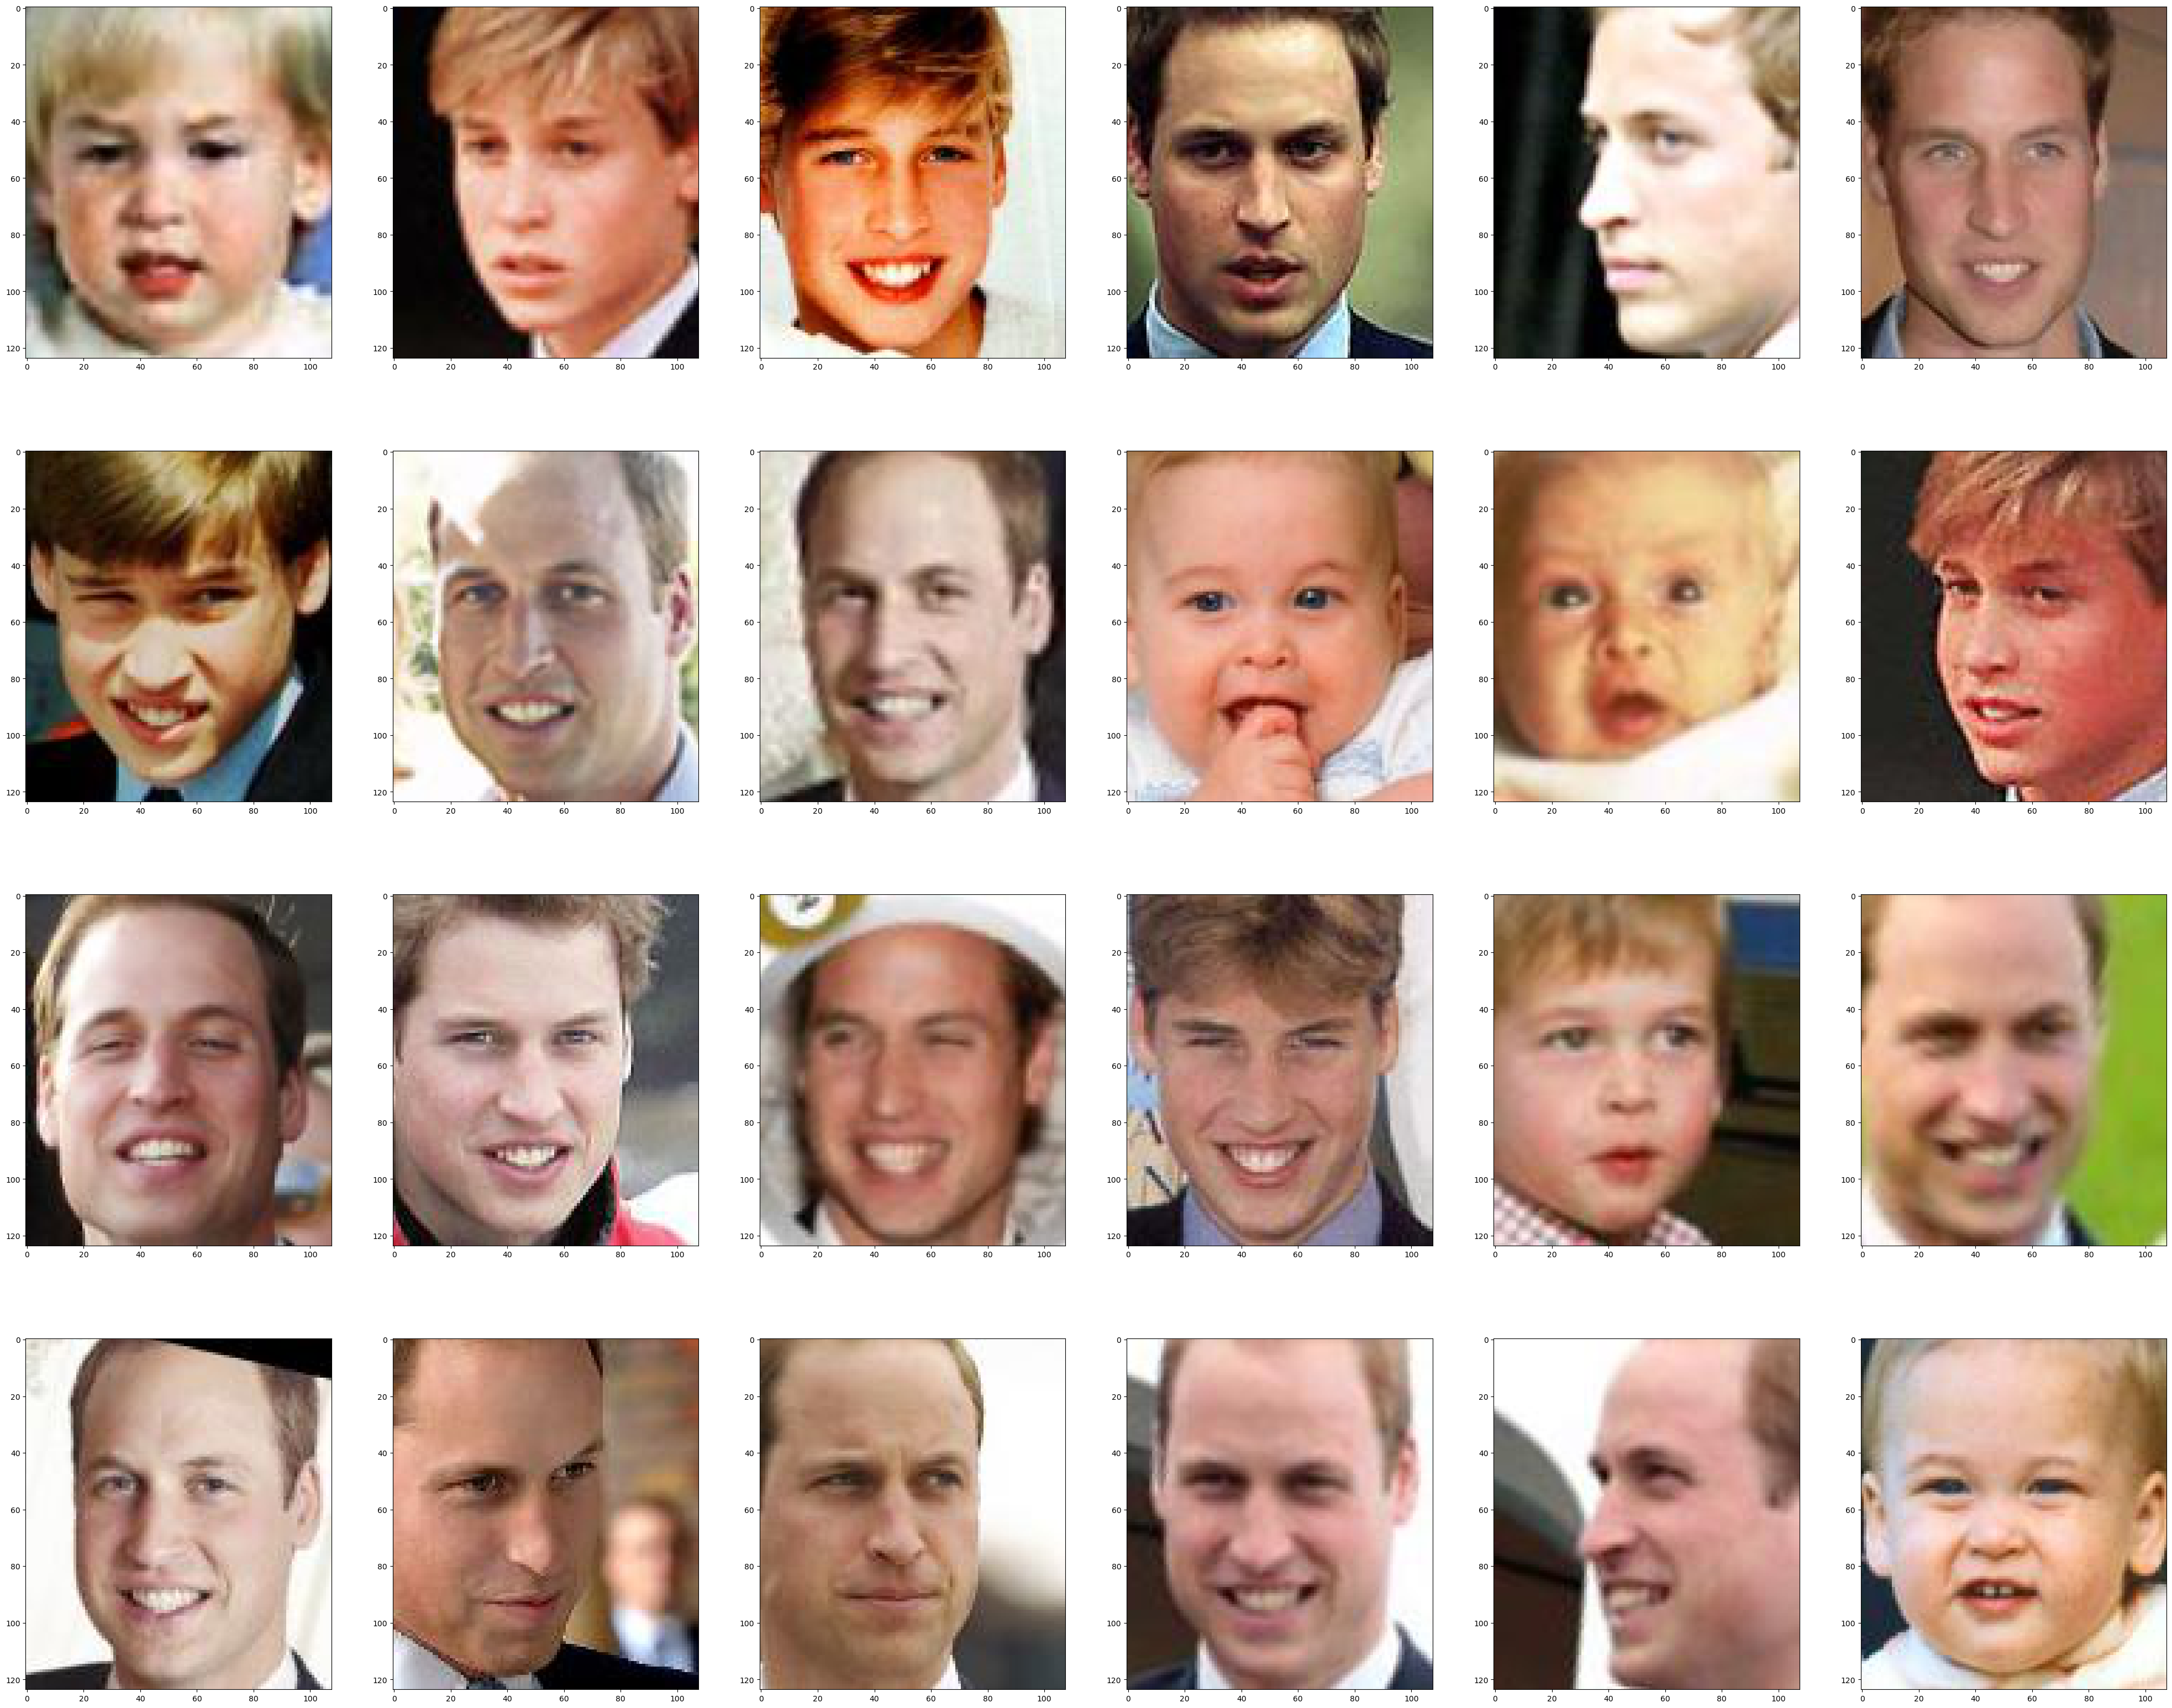

In [301]:
most_pic_members = train_images_df[train_images_df["uniqueId"] == kin_with_most_pic.index[0]].files.values
fig, ax = plt.subplots(4, 6, figsize=(50, 40))
row = 0
col = 0
for index in range(len(most_pic_members[:24])):
    with open(most_pic_members[index], 'rb') as f:
        img = Image.open(f)
        ax[row][col].imshow(img)

        if(col < 5):
            col = col + 1
        else: 
            col = 0
            row = row + 1
fig.show()

In [302]:
family_with_most_members = train_images_df.groupby("familyId")["kinId"].nunique().sort_values(ascending=False)
print("Family with maximum number of members: {0}, Member Count: {1}".format(family_with_most_members.index[0], family_with_most_members[0]))
print("Family with least number of members: {0}, Member Count: {1}".format(
    family_with_most_members.index[len(family_with_most_members)-1], 
    family_with_most_members[len(family_with_most_members)-1]))
large_family_df = train_images_df[train_images_df["familyId"]  == family_with_most_members.index[0]]
large_family_df.head()

Family with maximum number of members: F0601, Member Count: 41
Family with least number of members: F0591, Member Count: 2


,files,familyId,kinId,uniqueId
8983,c:/fiw/root/fiftyone/fiw/train/data/F0601/MID1...,F0601,MID1,MID1/F0601
8984,c:/fiw/root/fiftyone/fiw/train/data/F0601/MID1...,F0601,MID1,MID1/F0601
8985,c:/fiw/root/fiftyone/fiw/train/data/F0601/MID1...,F0601,MID1,MID1/F0601
8986,c:/fiw/root/fiftyone/fiw/train/data/F0601/MID1...,F0601,MID1,MID1/F0601
8987,c:/fiw/root/fiftyone/fiw/train/data/F0601/MID1...,F0601,MID1,MID1/F0601


In [303]:
def render_bar_chart(data_df, column_name, title, filename):
    series = data_df[column_name].value_counts()
    count = series.shape[0]
    
    trace = go.Bar(x = series.index, y=series.values, marker=dict(
        color=series.values,
        showscale=True
    ))
    layout = go.Layout(title=title)
    data = [trace]
    fig = go.Figure(data=data, layout=layout)
    py.iplot(fig, filename=filename)
    
    
render_bar_chart(large_family_df, 'uniqueId', 'Pic Count by Members', 'members')

C:\Users\אליאב\AppData\Local\Temp\ipykernel_25424\3303696485.py:19: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



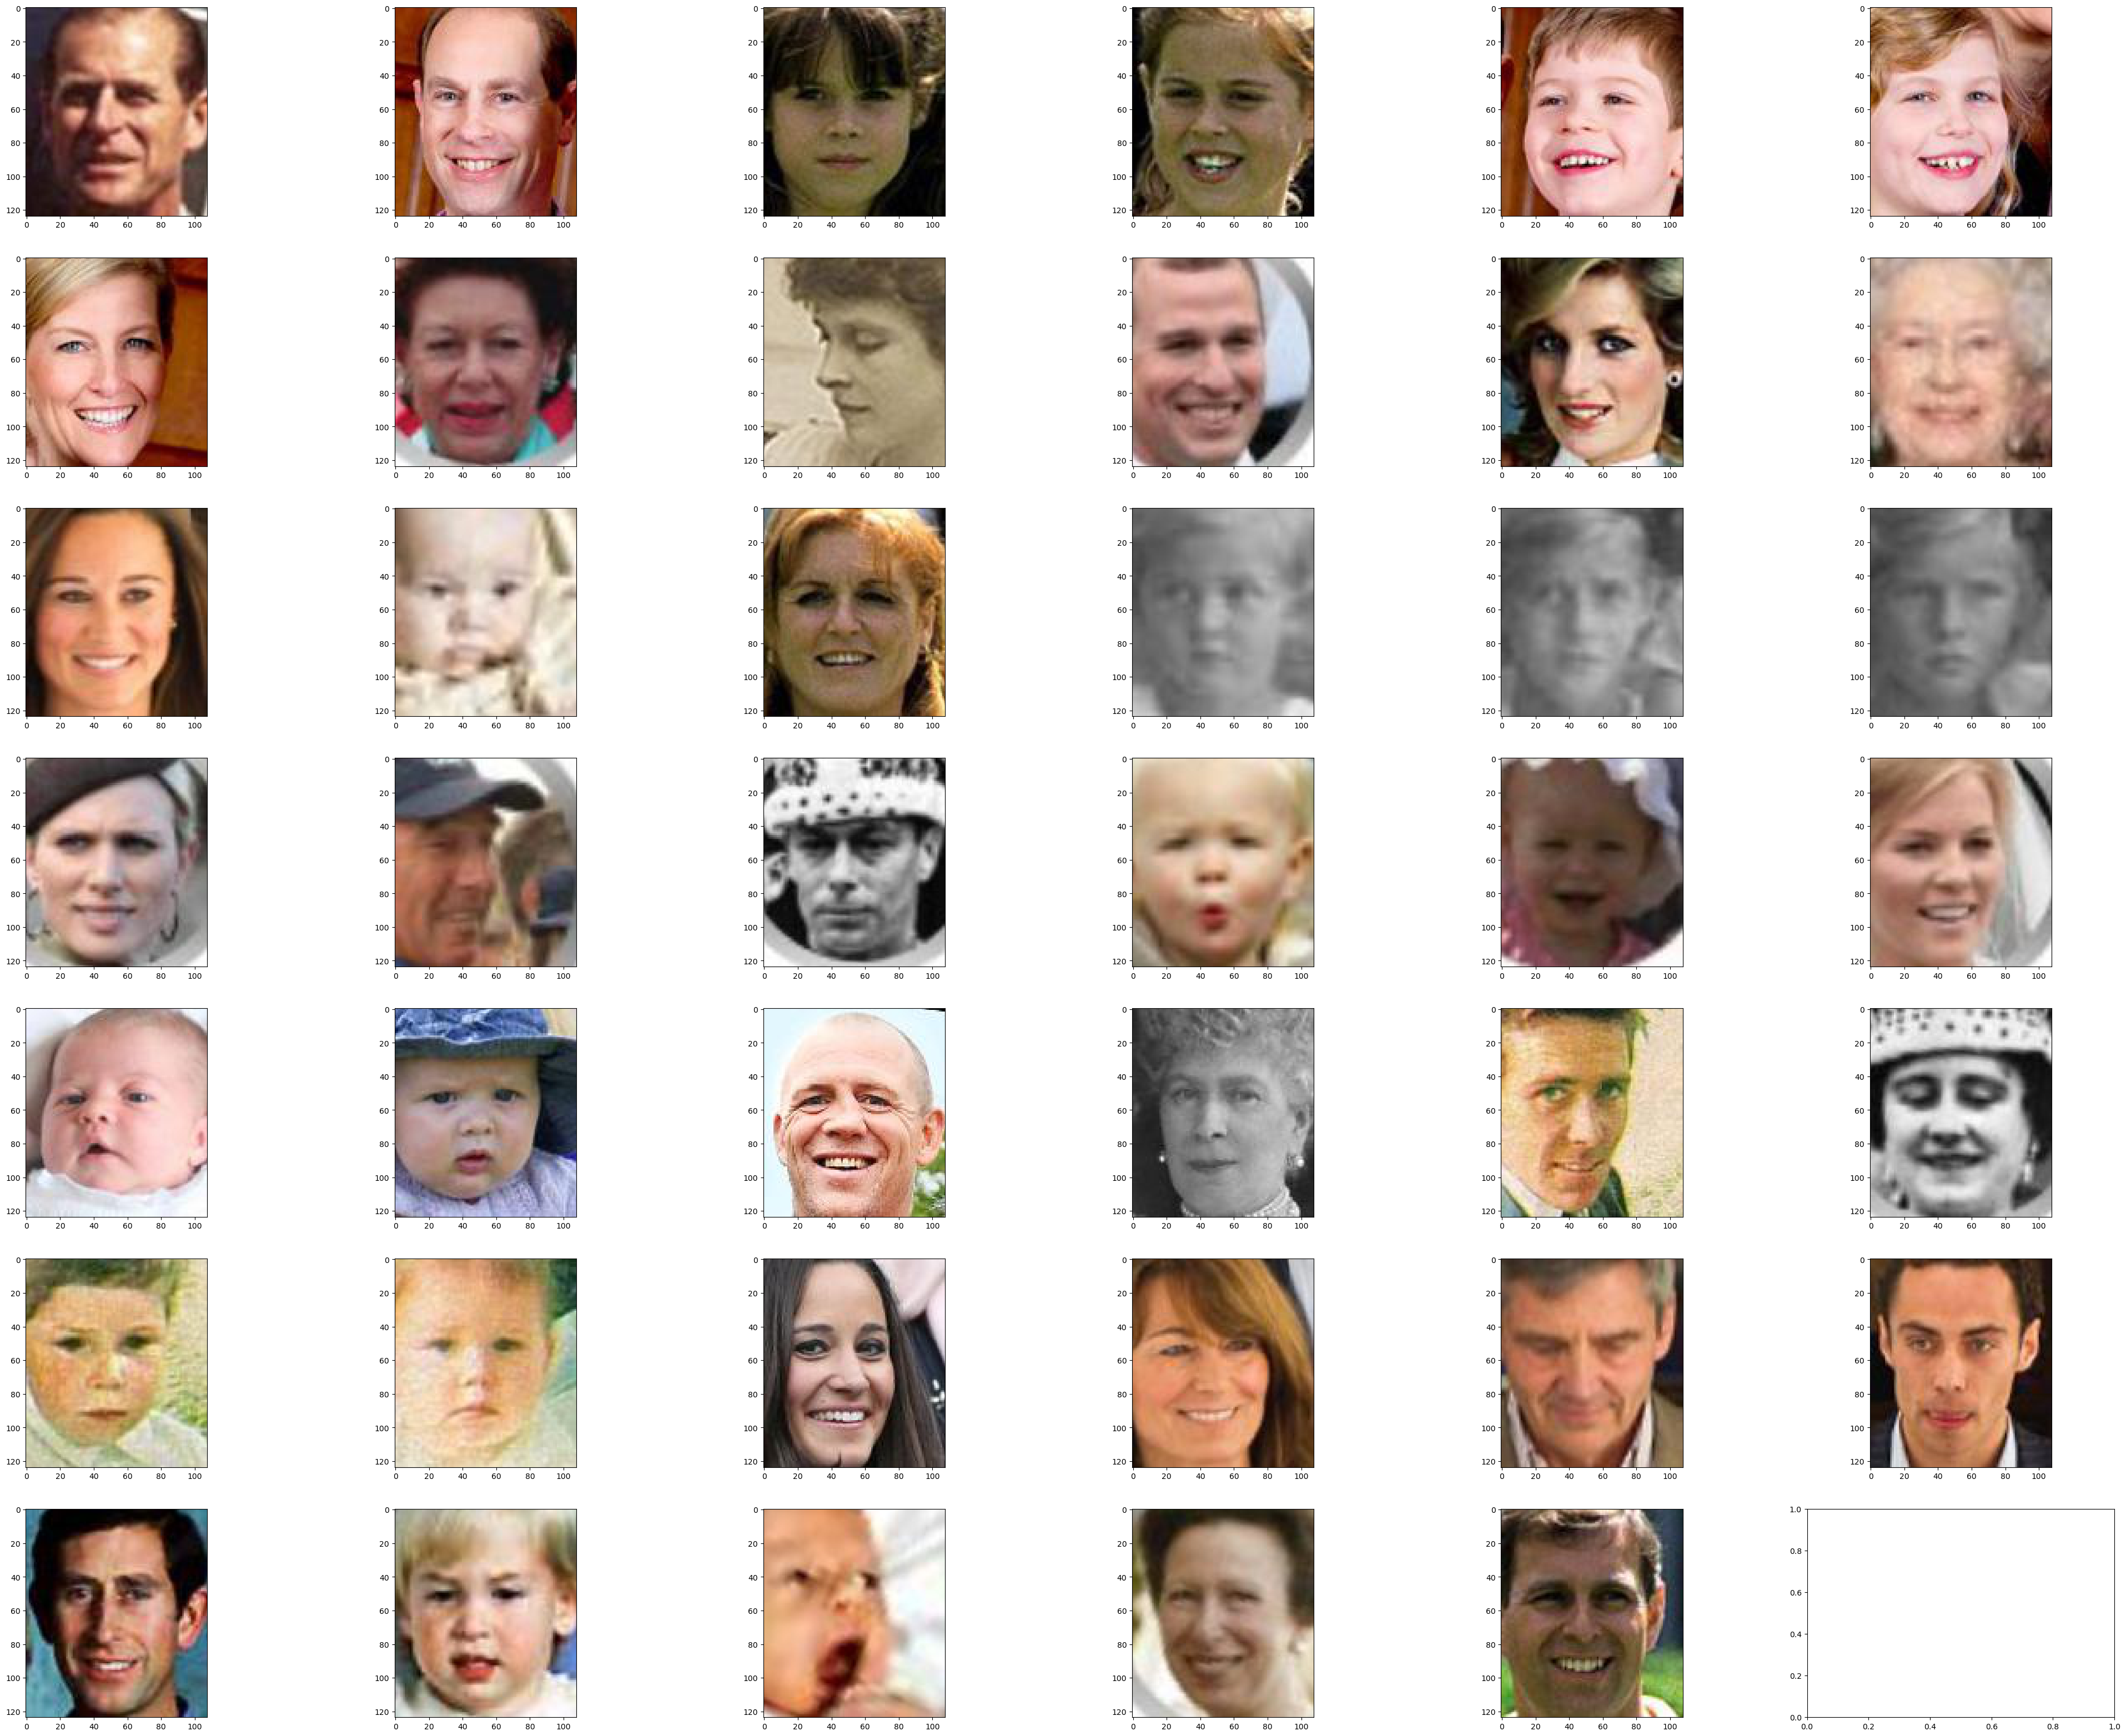

In [304]:
def render_images(large_family_df):
    large_family_pics = [large_family_df.loc[large_family_df.loc[large_family_df["uniqueId"] == aKin].index[0]]["files"] for aKin in large_family_df["uniqueId"].unique()]
    nrows = round(len(large_family_pics) / 6) 


    fig, ax = plt.subplots(nrows, 6, figsize=(50, 40))
    row = 0
    col = 0
    for index in range(len(large_family_pics)):
        with open(large_family_pics[index], 'rb') as f:
            img = Image.open(f)
            ax[row][col].imshow(img)

            if(col < 5):
                col = col + 1
            else: 
                col = 0
                row = row + 1
    fig.show()
render_images(large_family_df)

In [305]:
#!pip install tensorflow

In [306]:

families_directory = os.path.join(base_path, 'train/data')
families = os.listdir(families_directory)

x = []
y = []
z = {}
w = {}
ind_counter = 0
last_counter = 0

for family in families:
    z[int(family[1:])] = {}
    last_counter = ind_counter
    for relative in os.listdir(os.path.join(families_directory,  family)):
        import re
        m = re.search(r'\d+$', relative)
        if m is not None:
            relative_dir = os.path.join(families_directory, family)
            z[int(family[1:])][int(relative[3:])] = []
            pic_counter = 0
            for pic in os.listdir(os.path.join(relative_dir, relative)):
                pic_dic = os.path.join(relative_dir, relative)
                x.append(np.asarray(Image.open(os.path.join(pic_dic, pic)).convert('RGB'),dtype=np.float32))
                y.append([int(family[1:]), int(relative[3:]), pic_counter])
                w[ind_counter] = []
                for ind_pic in range(last_counter, ind_counter):
                    w[ind_pic].append(ind_counter)
                for ind_pic in range(last_counter, ind_counter + 1):
                    w[ind_counter].append(ind_pic)
                pic_counter += 1
                ind_counter += 1
related = pd.read_csv(os.path.join(base_path+ '/train/labels.csv'))
for ind in range(0, len(related)):
    try:
        z[int(related.iloc[ind]['p1'].split('/')[0][1:])][int(related.iloc[ind]['p1'].split('/')[1][3:])].append(int(related.iloc[ind]['p2'].split('/')[1][3:]))
        z[int(related.iloc[ind]['p1'].split('/')[0][1:])][int(related.iloc[ind]['p2'].split('/')[1][3:])].append(int(related.iloc[ind]['p1'].split('/')[1][3:]))
    except:
        print('ind ', ind, ' was not resolved')

0

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (15845,) + inhomogeneous part.

In [308]:
x = np.array(x, dtype='object')/255.0
len(y), len(x)

(15845, 15845)

In [309]:
x

array([array([[[0.07843138, 0.08627451, 0.04313726],
               [0.03137255, 0.03921569, 0.        ],
               [0.04313726, 0.05098039, 0.        ],
               ...,
               [0.7254902 , 0.7254902 , 0.6862745 ],
               [0.6901961 , 0.6901961 , 0.6509804 ],
               [0.6784314 , 0.6784314 , 0.6392157 ]],

              [[0.23137255, 0.23921569, 0.1882353 ],
               [0.20392157, 0.21176471, 0.16078432],
               [0.21176471, 0.21960784, 0.16470589],
               ...,
               [0.68235296, 0.68235296, 0.6431373 ],
               [0.6862745 , 0.6862745 , 0.64705884],
               [0.69803923, 0.69803923, 0.65882355]],

              [[0.35686275, 0.3647059 , 0.30980393],
               [0.3529412 , 0.3647059 , 0.29803923],
               [0.36078432, 0.37254903, 0.30588236],
               ...,
               [0.7176471 , 0.7176471 , 0.6784314 ],
               [0.7411765 , 0.7411765 , 0.7019608 ],
               [0.7490196 , 0.74901

In [138]:
import tensorflow as tf
import keras
from keras.layers import Input, Conv2D, Lambda, Dense, Flatten,MaxPooling2D #תmerge
from keras.models import Model, Sequential
from keras.regularizers import l2
from keras import backend as K
from tensorflow.keras.optimizers import SGD, Adam

array([15298,  7497, 10466,  3066,  3997, 11717,  2908,  7397,  3843,
       12922, 15480,  8948,  1185, 11184,  5387, 10024, 10211,  7516,
        1600, 11995,  7563,  7064,  4908,  4946,   497,  6299, 10618,
       11875,  8896,  4616,  2343, 13109, 10928, 13636, 13672, 13811,
       10086,  8672,  9850, 11907,  5518, 12249,  3811, 13879, 13746,
        4407,  5269,  8092,  2657, 11924,   440, 12934, 12088,  5654,
        1967,  2413,  7458,  6214,   407,  9974, 11208,   770,  7116,
        1874])

In [310]:
def get_batch(x, y, z, w, batch_size=64):
    rand_indexes_1 = []
    batch_x = []
    batch_y = np.zeros(batch_size)
    batch_x.append(np.zeros((batch_size, 224, 224, 3))) # final size is (2, batch_size, 224, 224, 3)
    batch_x.append(np.zeros((batch_size, 224, 224, 3)))
    ran_values = np.random.randint(0,2, (1,batch_size)) # Random value which determines whether to chose from relatives or not so that batches are balanced
    rand_indexes_0 = np.random.choice(range(0, len(x)), batch_size, replace=False)  # Random Indexes for choseing the first half of pics
    for ind_batchy in range(0, batch_size):  # Creating the 2nd half of pictures either from relatives or non-relatives
        if ran_values[0][ind_batchy] > 0.5:
            rand_indexes_1.append(int(np.random.choice(w[rand_indexes_0[ind_batchy]], 1, replace=False)))
        else:
            rand_indexes_1.append(int(np.random.choice(range(0, len(x)), 1, replace=False)))
    rand_indexes_1 = np.asarray(rand_indexes_1)
    batch_x[0] = x[rand_indexes_0]
    batch_x[1] = x[rand_indexes_1]
    for ind_batch in range(0, batch_size): # Creating labels for the batches of pictures
        if y[rand_indexes_0[ind_batch]][0] == y[int(rand_indexes_1[ind_batch])][0]:
            if (y[rand_indexes_0[ind_batch]][1] in z[y[int(rand_indexes_1[ind_batch])][0]][y[int(rand_indexes_1[ind_batch])][1]]) or (y[rand_indexes_0[ind_batch]][1] == y[int(rand_indexes_1[ind_batch])][1]):
                batch_y[ind_batch] = 1
            else:
                batch_y[ind_batch] = 0
        else:
            batch_y[ind_batch] = 0
    return (batch_x, batch_y)

In [311]:
input_shape = (224, 224, 3)
left_input = Input(input_shape)
right_input = Input(input_shape)

W_init = keras.initializers.RandomNormal(mean=0.0, stddev=1e-2)
b_init = keras.initializers.RandomNormal(mean=0.5, stddev=1e-2)

model = keras.models.Sequential([
    keras.layers.Conv2D(64, (16, 16), activation='relu', input_shape=input_shape, kernel_initializer=W_init, bias_initializer=b_init, kernel_regularizer=l2(2e-4)),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Conv2D(128, (8, 8), activation='relu', kernel_initializer=W_init, bias_initializer=b_init, kernel_regularizer=l2(2e-4)),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Conv2D(128, (4, 4), activation='relu', kernel_initializer=W_init, bias_initializer=b_init, kernel_regularizer=l2(2e-4)),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Conv2D(256, (4, 4), activation='relu', kernel_initializer=W_init, bias_initializer=b_init, kernel_regularizer=l2(2e-4)),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Flatten(),
    keras.layers.Dense(4096, activation='relu', kernel_initializer=W_init, bias_initializer=b_init),
    keras.layers.Dense(512, activation='relu', kernel_initializer=W_init, bias_initializer=b_init),
    keras.layers.Dense(64, activation='relu', kernel_initializer=W_init, bias_initializer=b_init)
])

encoded_l = model(left_input)
encoded_r = model(right_input)
L1_layer = Lambda(lambda tensor: K.abs(tensor[0] - tensor[1])) # Getting the L1 Distance between the 2 encodings
subtracted = L1_layer([encoded_l, encoded_r]) # Add the distance function to the network
prediction = Dense(1, activation='sigmoid', bias_initializer=b_init)(subtracted)
siamese_net = Model(inputs=[left_input, right_input], outputs=prediction)
[print(i.shape, i.dtype) for i in siamese_net.inputs]
[print(o.shape, o.dtype) for o in siamese_net.outputs]
[print(l.name, l.input_shape, l.dtype) for l in siamese_net.layers]
optimizer = Adam(learning_rate=0.00003)
siamese_net.compile(loss="binary_crossentropy", optimizer=optimizer)

C:\ProgramData\anaconda3\Lib\site-packages\keras\src\initializers\initializers.py:120: UserWarning:

The initializer RandomNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.



(None, 224, 224, 3) <dtype: 'float32'>
(None, 224, 224, 3) <dtype: 'float32'>
(None, 1) <dtype: 'float32'>
input_33 [(None, 224, 224, 3)] float32
input_34 [(None, 224, 224, 3)] float32
sequential_16 (None, 224, 224, 3) float32
lambda_16 [(None, 64), (None, 64)] float32
dense_67 (None, 64) float32


In [353]:
epochs = 20000
batch_size = 64

loss_list = []
accuracy_list = []
for epoch in range(1, epochs):
    batch_x, batch_y = get_batch(x, y, z, w, batch_size)
    loss = siamese_net.train_on_batch(np.asarray(batch_x), batch_y)
    loss_list.append((epoch, loss))
    if epoch%50 == 0:
        print('Epoch:', epoch, ', Loss:', loss)
        print("=============================================")
        accuracy, results, related = nway_one_shot(model, x, y, z, w, 100)
        accuracy_list.append((epoch, accuracy))
        print('Accuracy as of', epoch, 'epochs:', accuracy)
        print("=============================================")
        if(accuracy>99):
            print("Achieved more than 90% Accuracy")

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type numpy.ndarray).

In [ ]:
np.array(x[0], dtype=np.float32)

In [248]:
type(batch_x[0][0][0][0][0])

numpy.float32

In [330]:
 len([y.dtype for y in  x  for x in batch_x ])

31690

In [356]:
np.asarray(batch_x , dtype=np.float32)

ValueError: setting an array element with a sequence.